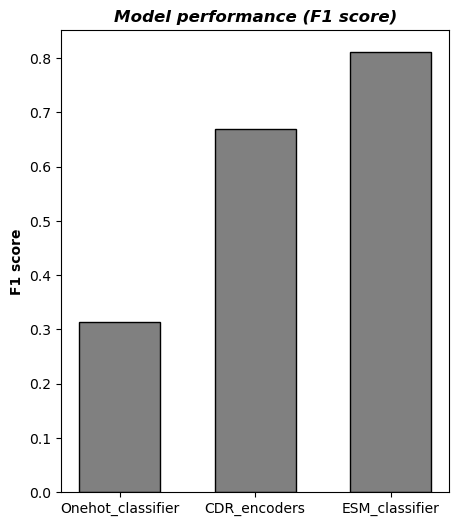

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

labels = ['Onehot_classifier', 'CDR_encoders', 'ESM_classifier']
values = []
cutoff = [0.5, 0.7, 0.9]
# Load data from CSV files
df1 = pd.read_csv('./result/onehot_baseline_epitope_test_prediction.tsv',sep='\t')
df1 = df1[df1.predicted_probability>0.5]
df2 = pd.read_csv('./result/Encoder_HA_epitope_test_predictions.csv')
df2 = df2[df2.predicted_probability>0.5]
df3 = pd.read_csv('./result/esm2_baseline_epitope_test_prediction.tsv',sep='\t')
df3 = df3[df3.predicted_probability>0.5]

y1_true = df1['real_label']
y1_pred = df1['predicted_class']
df1_f1 = f1_score(y1_true, y1_pred, average='weighted')
values.append(df1_f1)

y2_true = df2['real_label']
y2_pred = df2['predicted_class']
df2_f1 = f1_score(y2_true, y2_pred, average='weighted')
values.append(df2_f1)

y3_true = df3['real_label']
y3_pred = df3['predicted_class']
df3_f1 = f1_score(y3_true, y3_pred, average='weighted')
values.append(df3_f1)

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 6))
bar_width = 0.6

# Create a bar plot
ax.bar(labels, values,color='gray', width=bar_width, edgecolor='black')

# Add title and labels
ax.set_title('Model performance (F1 score)',fontdict={'size': 12, 'weight': 'bold', 'style': 'italic'})
ax.set_xlabel('',fontdict={'size': 10, 'weight': 'bold'})
ax.set_ylabel('F1 score',fontdict={'size': 10, 'weight': 'bold'})

# Rotate the x-axis labels
plt.xticks(rotation=0,ha='center')

# Save the plot as a PNG file
plt.savefig('./result/model_benchmark_F1.png', dpi=300, bbox_inches='tight')

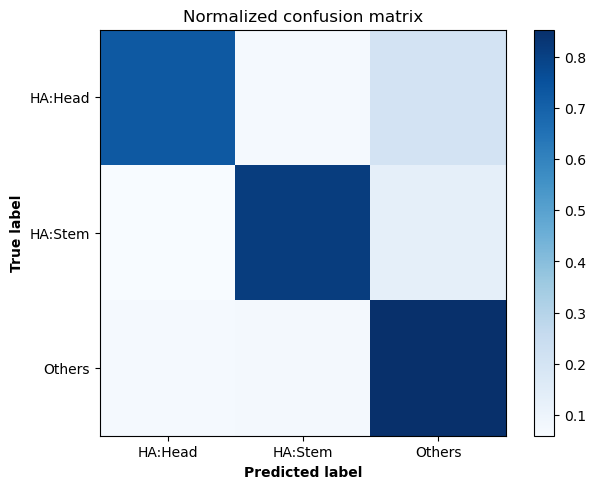

In [4]:
from sklearn.metrics import confusion_matrix
classes = ["HA:Head", "HA:Stem", "Others"]
# create the confusion matrix
cm = confusion_matrix(y3_true, y3_pred)
# plot the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# classes = [str(i) for i in range(cm.shape[0])]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

plt.title("Normalized confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True label',fontdict={'size': 10, 'weight': 'bold'})
plt.xlabel('Predicted label',fontdict={'size': 10, 'weight': 'bold'})
plt.savefig('./result/confusion_matrix.png', dpi=300)

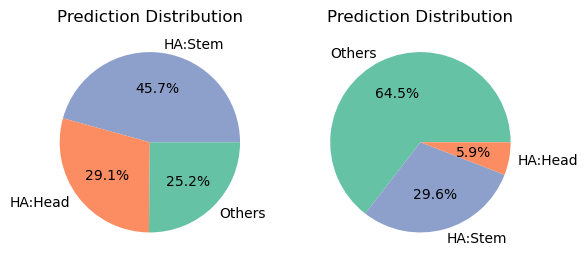

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read the TSV file into a Pandas DataFrame
df = pd.read_csv('./result/Flu_unknown_prediction.tsv', delimiter='\t')
df2 = pd.read_csv('./result/Flu_unknown_predictions_by_Encoder.csv')
# Define the class label dictionary
class_labels = {0: 'HA:Head', 1: 'HA:Stem', 2: 'Others'}
# Extract the 'prediction' column
pred_col = df['predicted_class'].map(class_labels)
pred_col2 = df2['predicted_label'].map(class_labels)

colors = sns.color_palette('Set2', len(value_counts))
# Define the colors for each unique value in the column
colors_dict = {
    'Others': colors[0],
    'HA:Head': colors[1],
    'HA:Stem': colors[2]
}

# Define the colors for the pie chart using a Seaborn color palette

# Count the occurrences of each unique value in the column
value_counts = pred_col.value_counts()
value_counts2 = pred_col2.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
# Create a pie chart using Matplotlib
ax1.pie(value_counts.values, labels=value_counts.index, colors=[colors_dict[x] for x in value_counts.index],autopct='%1.1f%%')
ax1.set_title('Prediction Distribution')


# Create a pie chart using Matplotlib
ax2.pie(value_counts2.values, labels=value_counts2.index, colors=[colors_dict[x] for x in value_counts2.index],autopct='%1.1f%%')
ax2.set_title('Prediction Distribution')

# Save the pie chart as a PNG file
plt.savefig('./result/prediction_distribution.png', dpi=300, bbox_inches='tight')